In [1]:
from glob import glob
import datetime
import plotly

from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
file = open("headline33.txt",encoding='UTF-8')

In [3]:
lists = file.readlines()

In [4]:
file.close()

In [5]:
lists

[',0\n',
 "0,지만원 '거짓 판명' 5·18 北 개입설 또 반복…비난 쇄도\n",
 '1,한국당 “손혜원 국조 받아라”…민주 “의혹 있는 모든의원 다…\n',
 '2,“정책 나올때마다 시장왜곡 우려” “주52시간도 또하나의 규…\n',
 '3,"""朴 전대통령 건강 좋지 않지만… 위독설·체중39㎏은 사실 …"\n',
 '4,"文대통령 ""예타 제도 유지…균형발전 위해 개선 필요 있어"""\n',
 '5,[벼랑끝 공인중개사②]온ㆍ오프라인서 동반 위협…거래절벽…\n',
 '6,작년 세금 계획보다 25.4조 더 걷혔다…역대 최대 초과 세수\n',
 '7,초과 세수 25.4조 원 ‘사상 최대’…“반도체·부동산 호황 덕…\n',
 '8,韓 외환보유액 4055억 달러 사상 최대…석달 연속 증가세(종…\n',
 '9,"""내 택배 어디쯤 왔나""…\'택배 조회\' 종일 실검에 왜?"\n',
 '10,이번엔 뚝섬 장어집 “골목식당 제작진이 사기꾼 만들어”… …\n',
 "11,전국 대부분 지역 '한파주의보'…서울 체감온도 영하 14도\n",
 '12,정부와 정치권에 경종 울린 두 의사의 죽음 [어떻게 생각하…\n',
 '13,서울 국공립 중고교 교사 임용에 836명 합격…남성은 23%\n',
 '14,"""한 명이라도 더 살려야""…끝까지 현장 지킨 \'응급의료 버팀…"\n',
 '15,[날씨] 출근길 동장군 맹위…체감온도 영하 15도\n',
 "16,[날씨] 전국 대부분 '한파주의보'...주말에도 강추위 계속\n",
 '17,설 연휴 인천공항 하루평균 이용객 20만명 넘어…역대 최다\n',
 '18,"""너도 스테로이드 했지?""…피트니스계에 번지는 \'약투\'"\n',
 '19,[날씨] 주말ㆍ휴일 내내 한겨울 추위…건조특보 확대\n',
 '20,"베네수엘라, 물고 물린 \'쩐의 전쟁\'"\n',
 "21,2월 미중 정상회담 무산 배경은?…'북미회담과 분리 의도'\n",
 '22,[특파원리포트] 대단한 중국인들…방콕 호텔 투숙하며 ‘원정…\n',
 '23,"日언론

In [6]:
print(type(lists))

<class 'list'>


In [7]:
data = ''.join(lists)

In [8]:
print(type(data))

<class 'str'>


In [9]:
news = data.replace("\n","")
news

',00,지만원 \'거짓 판명\' 5·18 北 개입설 또 반복…비난 쇄도1,한국당 “손혜원 국조 받아라”…민주 “의혹 있는 모든의원 다…2,“정책 나올때마다 시장왜곡 우려” “주52시간도 또하나의 규…3,"""朴 전대통령 건강 좋지 않지만… 위독설·체중39㎏은 사실 …"4,"文대통령 ""예타 제도 유지…균형발전 위해 개선 필요 있어"""5,[벼랑끝 공인중개사②]온ㆍ오프라인서 동반 위협…거래절벽…6,작년 세금 계획보다 25.4조 더 걷혔다…역대 최대 초과 세수7,초과 세수 25.4조 원 ‘사상 최대’…“반도체·부동산 호황 덕…8,韓 외환보유액 4055억 달러 사상 최대…석달 연속 증가세(종…9,"""내 택배 어디쯤 왔나""…\'택배 조회\' 종일 실검에 왜?"10,이번엔 뚝섬 장어집 “골목식당 제작진이 사기꾼 만들어”… …11,전국 대부분 지역 \'한파주의보\'…서울 체감온도 영하 14도12,정부와 정치권에 경종 울린 두 의사의 죽음 [어떻게 생각하…13,서울 국공립 중고교 교사 임용에 836명 합격…남성은 23%14,"""한 명이라도 더 살려야""…끝까지 현장 지킨 \'응급의료 버팀…"15,[날씨] 출근길 동장군 맹위…체감온도 영하 15도16,[날씨] 전국 대부분 \'한파주의보\'...주말에도 강추위 계속17,설 연휴 인천공항 하루평균 이용객 20만명 넘어…역대 최다18,"""너도 스테로이드 했지?""…피트니스계에 번지는 \'약투\'"19,[날씨] 주말ㆍ휴일 내내 한겨울 추위…건조특보 확대20,"베네수엘라, 물고 물린 \'쩐의 전쟁\'"21,2월 미중 정상회담 무산 배경은?…\'북미회담과 분리 의도\'22,[특파원리포트] 대단한 중국인들…방콕 호텔 투숙하며 ‘원정…23,"日언론 ""문 대통령, \'징용공 배상은 日기업 문제\' 입장"""24,크로아티아서 2억원 넘는 \'장어 밀반출\' 한국인 2명 체포25,LG發 유료방송 \'지각변동\'…KT·SKT도 속속 케이블TV 인…26,[이진욱의 전자수첩] 한국은 봉?…같은 TV가 미국보다 한국…27,"[How News

In [10]:
%matplotlib inline
from matplotlib import rc
import matplotlib.pyplot as plt
rc('font', family='NanumGothic')

In [11]:
from wordcloud import WordCloud


(-0.5, 399.5, 199.5, -0.5)

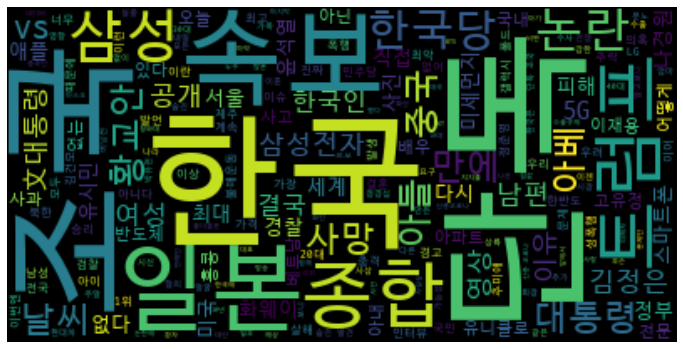

In [12]:
wcloud = WordCloud('./data/D2Coding.ttf',relative_scaling = 0.2).generate(news)
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")